#### We ty to capture the upward or downward trend of stock price (5 years of training)

In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import time

In [2]:
# Importing the training set
dataset_train = pd.read_csv('data/Google_Stock_Price_Train.csv')
training_set = dataset_train.iloc[:, 1:2].values

In [3]:
dataset_train

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"
...,...,...,...,...,...,...
1253,12/23/2016,790.90,792.74,787.28,789.91,"623,400"
1254,12/27/2016,790.68,797.86,787.66,791.55,"789,100"
1255,12/28/2016,793.70,794.23,783.20,785.05,"1,153,800"
1256,12/29/2016,783.33,785.93,778.92,782.79,"744,300"


In [4]:
len(training_set)

1258

In [5]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
training_set_scaled = sc.fit_transform(training_set) # stock prices normalized between (0 and 1)

In [6]:
# Data structure with 60 time steps (past information(in days)) and 1 output
# prediction is done using correlation of 60 previously financial days (3 months)
# memorizing 60 previous time steps
X_train, y_train = [], []
for i in range(60, len(training_set)):
    X_train.append(training_set_scaled[i-60:i,0])
    y_train.append(training_set_scaled[i,0:1])
X_train, y_train = np.array(X_train), np.array(y_train)

In [7]:
# refer to the Keras documentation: Reccurent layers: input shapes
# shape 3d::(batch_size or samples, time_steps, no_of_indicators(predictors) ie other correlators)
X_train = np.reshape(X_train,(X_train.shape[0],X_train.shape[1], 1)) 

In [8]:
# X_train

In [9]:
# stacked LSTM, with some dropout regularization to avoid overfitting
# Importing the Keras libraries and packages

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout


Using TensorFlow backend.


In [10]:
# initializing the RNN as sequence of layers
regressor = Sequential()

# LSTM: #arg=3 units (neurons): LSTM cells or memory units in the layer, 
# return_seq=True (stacked LSTM for last lstm its false)
# input shape in 3D 2 are mentioned (timesteps, indicators)

# 1st layer
regressor.add(LSTM(units=50, return_sequences=True, input_shape=((X_train.shape[1],1))))
regressor.add(Dropout(rate=0.2))

In [11]:
# Extra LSTM layers and add drop out regularization to each of them
# 2nd LSTM layer
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(rate=0.2))
# 3rd LSTM layer
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(rate=0.2))
# 4th LSTM layer
regressor.add(LSTM(units=50))
regressor.add(Dropout(rate=0.2))

In [12]:
# Output layer
regressor.add(Dense(units=1))

In [20]:
# Compiling RNN
start = time.time()
regressor.compile(optimizer='adam', loss='mean_squared_error')

# Fitting the RNN to training set
# x:input, y: ground truth
# epoch should be choosen based on convergence
# consider data more than 5 years
regressor.fit(x=X_train,y=y_train, batch_size=32, epochs=500)
end = time.time()
print('Finished in {} seconds.'.format(end-start))

Epoch 1/500
1198/1198 [==============================] - 9s 8ms/step - loss: 0.0019
Epoch 2/500
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0016
Epoch 3/500
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0015
Epoch 4/500
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0015
Epoch 5/500
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0016
Epoch 6/500
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0014
Epoch 7/500
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0015
Epoch 8/500
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0014
Epoch 9/500
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0014
Epoch 10/500
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0013
Epoch 11/500
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0014
Epoch 12/500
1198/1198 [==============================] - 6s 5ms/step - lo

1198/1198 [==============================] - 8s 7ms/step - loss: 9.2311e-04
Epoch 190/500
1198/1198 [==============================] - 8s 7ms/step - loss: 9.3584e-04
Epoch 191/500
1198/1198 [==============================] - 8s 7ms/step - loss: 9.7500e-04
Epoch 192/500
1198/1198 [==============================] - 8s 7ms/step - loss: 9.2929e-04
Epoch 193/500
1198/1198 [==============================] - 8s 7ms/step - loss: 9.0851e-04
Epoch 194/500
1198/1198 [==============================] - 8s 7ms/step - loss: 9.0841e-04
Epoch 195/500
1198/1198 [==============================] - 8s 7ms/step - loss: 9.0490e-04
Epoch 196/500
1198/1198 [==============================] - 8s 7ms/step - loss: 8.9581e-04
Epoch 197/500
1198/1198 [==============================] - 8s 7ms/step - loss: 9.3413e-04
Epoch 198/500
1198/1198 [==============================] - 8s 7ms/step - loss: 8.4315e-04
Epoch 199/500
1198/1198 [==============================] - 8s 7ms/step - loss: 9.3716e-04
Epoch 200/500
1198/1198 

1198/1198 [==============================] - 6s 5ms/step - loss: 9.2911e-04
Epoch 372/500
1198/1198 [==============================] - 6s 5ms/step - loss: 8.8079e-04
Epoch 373/500
1198/1198 [==============================] - 6s 5ms/step - loss: 8.7874e-04
Epoch 374/500
1198/1198 [==============================] - 6s 5ms/step - loss: 8.8276e-04
Epoch 375/500
1198/1198 [==============================] - 6s 5ms/step - loss: 8.8649e-04
Epoch 376/500
1198/1198 [==============================] - 6s 5ms/step - loss: 7.7587e-04
Epoch 377/500
1198/1198 [==============================] - 6s 5ms/step - loss: 8.8315e-04
Epoch 378/500
1198/1198 [==============================] - 6s 5ms/step - loss: 9.0191e-04
Epoch 379/500
1198/1198 [==============================] - 6s 5ms/step - loss: 7.9120e-04
Epoch 380/500
1198/1198 [==============================] - 6s 5ms/step - loss: 8.2867e-04
Epoch 381/500
1198/1198 [==============================] - 6s 5ms/step - loss: 8.3338e-04
Epoch 382/500
1198/1198 

In [21]:
# Getting the real stock price of 2017
# Importing the training set
dataset_test = pd.read_csv('data/Google_Stock_Price_Test.csv')
# testing_set
real_stock_price = dataset_test.iloc[:, 1:2].values

In [22]:
# Getting the predicted stock price of 2017
# We need here the data for 60 previous days
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis=0)
inputs = dataset_total[len(dataset_total)-len(dataset_test)-60:].values
# np.expand_dims(inputs,axis=1)
inputs = inputs.reshape(-1,1)
inputs = sc.fit_transform(inputs)
X_test = []
for i in range(60, len(inputs)):
    X_test.append(inputs[i-60:i,0])
X_test = np.array(X_test)
X_test = np.reshape(X_test,(X_test.shape[0],X_test.shape[1], 1)) 

# Prediction
predicted_stock_price = regressor.predict(x=X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

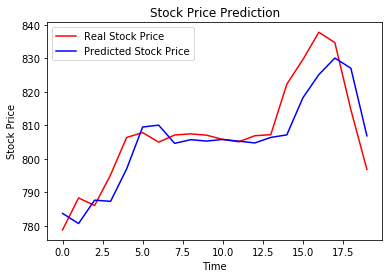

In [23]:
# Visualizing the result
# Robustness of our model
plt.plot(real_stock_price, color='r', label='Real Stock Price')
plt.plot(predicted_stock_price, color='b', label='Predicted Stock Price')
plt.legend()
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.show()